<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear</a></span><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#Função-Custo-Regularizada" data-toc-modified-id="Função-Custo-Regularizada-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Função Custo Regularizada</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Custo-e-Regularização" data-toc-modified-id="Custo-e-Regularização-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Custo e Regularização</a></span></li><li><span><a href="#Gradiente-e-Regularização" data-toc-modified-id="Gradiente-e-Regularização-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Gradiente e Regularização</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Visualizando-Treinamento" data-toc-modified-id="Visualizando-Treinamento-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Visualizando Treinamento</a></span></li></ul></li><li><span><a href="#Curvas-de-Aprendizado" data-toc-modified-id="Curvas-de-Aprendizado-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Curvas de Aprendizado</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo a implementação de um modelo de ```Regressão Linear Regularizada``` para estudar os efeitos das propriedades ```viés-variância``` nos algoritmos. Na primeira metade do exercício, será proposto o desenvolvimento de um modelo para predição da vazão de água através de uma torneira de acordo com o nível de água presente em um reservatório. Já na segunda metade, vamos avaliar alguns diagnósticos e examinar os efeitos de viés-variância no modelo.

## Regressão Linear

### Lendo os Dados

In [1]:
# Importando bibliotecas
import numpy as np
import scipy.io as sio

A partir da leitura do arquivo contendo os dados, é esperado receber:

    - Um set de treino (X, y);
    - Um set de validação cruzada (X_val, y_val);
    - Um set treino (X_test, y_test).

In [6]:
# Lendo os dados
data = sio.loadmat('ex5data1.mat')

In [7]:
# Visualizando o conteúdo importado
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [16]:
# Visualizando de forma mais dinâmica
print(f'Chaves do arquivo importado: {list(data.keys())[3:]}')

Chaves do arquivo importado: ['X', 'y', 'Xtest', 'ytest', 'Xval', 'yval']


In [119]:
# Separando conjuntos de Treino
X_train = data['X']
y_train = data['y']

# Separando conjuntos de Validação
X_val = data['Xval']
y_val = data['yval']

# Separando conjuntos de Teste
X_test = data['Xtest']
y_test = data['ytest']

In [120]:
# Verificando dimensões
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de X_val: {X_val.shape}')
print(f'Dimensões de X_test: {X_test.shape}')

Dimensões de X_train: (12, 1)
Dimensões de X_val: (21, 1)
Dimensões de X_test: (21, 1)


Temos em mãos um conjunto de dados com pouquíssimos dados. Acredito que não será possível aplicar com eficiência treinamentos a partir do Scikit-Learn. Será apenas um desenvolvimento didático.

Um outro ponto a ser destacado é que, de certa forma, não faz nenhum sentido o conjunto de treino possuir praticamente a metade da quantidade de dados dos conjuntos de validação e de teste. Isto não é, nem de longe, aplicável em problemas reais.

In [121]:
# Vamos verificar as primeiras linhas dos dados de treino
X_train[:5]

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945]])

Lembrando que:
    - Eixo x (feature): mudança no nível de água no reservatório
    - Eixo y (label): fluxo de água saindo da torneira

In [122]:
# Vejamos o label
y_train[:5]

array([[ 2.13431051],
       [ 1.17325668],
       [34.35910918],
       [36.83795516],
       [ 2.80896507]])

In [123]:
# Vamos alterar o label y para critérios de otimização futuros
print(f'Dimensões de y_train antes do reshape: {y_train.shape}')
y_train = y_train.reshape(-1)

print(f'Dimensões de y_train após o reshape: {y_train.shape}')
print(f'\nPrimeiras linhas de y_train: \n{y_train[:5]}')

Dimensões de y_train antes do reshape: (12, 1)
Dimensões de y_train após o reshape: (12,)

Primeiras linhas de y_train: 
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507]


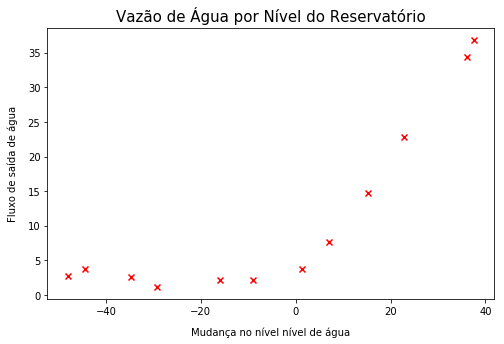

In [124]:
# Vamos plotar os dados
import matplotlib.pyplot as plt
%matplotlib inline

# Criando figure e eixo
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_train, y_train, marker='x', color='r')
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)
plt.show()

Através da plotagem, é possível perceber que o comportamento do modelo não pode ser linear, visto que os dados possem um comportamento exponencial (ou de graus polinomiais maiores) a medida que o mudança no nível de água do reservatório aumenta.

Para dar início ao desenvolvimento, vamos calcular a função custo considerando um modelo linear simples!

### Função Custo Regularizada

Em um primeiro momento, vamos considerar um modelo totalmente linear (grau polinomial = 1) apenas para definir uma função custo para os testes posteriores.

Fórmula:

\begin{equation*}
    J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2\right)+
              \frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_j^2\right)
\end{equation*}

Considerações:
    - lambda ALTO = tendência a UNDERFITTING
    - lambda BAIXO = tendência a OVERFITTING

#### Hypothesis

In [55]:
# Inicializando parâmetros de teste
theta_inicial = np.array((1, 1)).reshape(2, 1)
theta_inicial

array([[1],
       [1]])

Para iniciarmos os cálculos da função custo, precisamos, primeiro calcular a função ```hypothesis``` para Regressão Linear

\begin{equation*}
    h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n
\end{equation*}

In [125]:
# Adicionando termo de bias em X
m = X_train.shape[0]
X_train = np.c_[(np.ones((m, 1)), X_train)]

# Verificnado
print(f'Dimensões de X_train: {X_train.shape}')
print(f'\nPrimeiras linhas de X_train: \n{X_train[:5]}')

Dimensões de X_train: (12, 2)

Primeiras linhas de X_train: 
[[  1.         -15.93675813]
 [  1.         -29.15297922]
 [  1.          36.18954863]
 [  1.          37.49218733]
 [  1.         -48.05882945]]


In [57]:
# Verificando dimensão dos parâmetros
theta_inicial.shape

(2, 1)

Uma multiplicação de matriz com dimensões 12x2 por 2x1 resultará em h = 12x1, que é o que queremos!

In [58]:
# Calculando hypothesis
h = X_train.dot(theta_inicial)

# Verificando primeiras linhas
print(f'Primeiras linhas de h: \n{h[:5]}')

Primeiras linhas de h: 
[[-14.93675813]
 [-28.15297922]
 [ 37.18954863]
 [ 38.49218733]
 [-47.05882945]]


In [61]:
# Comparando com y (target)
print(f'Primeiras linhas de y_train: \n{y_train[:5]}')

Primeiras linhas de y_train: 
[[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]]


In [74]:
# Definindo função para cálculo da função hypothesis
def hypothesis(theta, X):
    """ Função responsável por cálcular a função hypothesis do modelo (predições)
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
    Output:
        h: função hypothesis (predições)"""
    
    h = X.dot(theta)
    return h   

In [75]:
# Testando mais uma vez
h = hypothesis(theta_inicial, X_train)
h[:5]

array([[-14.93675813],
       [-28.15297922],
       [ 37.18954863],
       [ 38.49218733],
       [-47.05882945]])

Obviamente temos uma grande diferença. Primeiro, porque os parâmetros foram iniciados em [1; 1] e, fatalmente esta está longe da combinação perfeita de parâmetros. Segundo, porque já vimos que o modelo linear (grau = 1) não se encaixa nos dados. Matematicamente, podemos provar esse "erro" através da função custo (esperamos obter um valor elevado pro custo).

#### Custo e Regularização

\begin{equation*}
    J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)^2\right)+
              \frac{\lambda}{2m}\left(\sum_{j=1}^{n}\theta_j^2\right)
\end{equation*}

In [63]:
# Subtração
h - y_train

array([[-17.07106864],
       [-29.3262359 ],
       [  2.83043945],
       [  1.65423217],
       [-49.86779453],
       [-10.06253041],
       [  1.59752458],
       [-36.3204502 ],
       [ -1.3510173 ],
       [-47.11545116],
       [  0.38584323],
       [  1.01032062]])

In [64]:
# Elevando ao quadrado
(h - y_train) ** 2

array([[2.91421385e+02],
       [8.60028112e+02],
       [8.01138746e+00],
       [2.73648407e+00],
       [2.48679693e+03],
       [1.01254518e+02],
       [2.55208479e+00],
       [1.31917510e+03],
       [1.82524774e+00],
       [2.21986574e+03],
       [1.48874998e-01],
       [1.02074775e+00]])

In [65]:
# Somando
sum((h - y_train) ** 2)

array([7294.83661329])

In [66]:
# Dividindo por 2m
sum((h - y_train) ** 2) / (2*m)

array([303.95152555])

In [72]:
# Regularização
lamda = 1
(lamda / (2 * m)) * theta_inicial.T.dot(theta_inicial)

array([[0.08333333]])

In [99]:
# Definindo função custo
def linRegCostFunction(theta, X, y, lamda):
    """ Função responsável por calcular a Função Custo de um problema de Regressão Linear
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
        y: labels do modelo;
        lamda: fator de regularização"""
    
    # Calculando hypothesis
    h = hypothesis(theta, X)
    
    # Calculando J sem regularização
    m = X.shape[0]
    unreg = sum((h - y) ** 2) / (2 * m)
    
    # Calculando fator de regularização
    reg = (lamda / (2 * m)) * theta_inicial.T.dot(theta_inicial)
    
    # Unindo termos
    J = (unreg + reg)[0][0]
    
    return J

In [100]:
# Testando sem regularização (resultado esperado = 303.95)
J = linRegCostFunction(theta_inicial, X_train, y_train, 0)
print(f'Custo da função com lambda = 0: {J}')

Custo da função com lambda = 0: 303.9515255535976


#### Gradiente e Regularização

\begin{equation*}
    \frac{\partial J(\theta)}{\partial\theta_j} = 
        \begin{cases} 
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)
                & \mbox{para } j\mbox{ = 0} \\
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right) +
            \frac{\lambda}{m}\theta_j &\mbox{para } j\mbox{ >= 1}
        \end{cases}
\end{equation*}  

Como podemos ver, o termo 0 dos parâmetros theta ```não é regularizado!``` Dessa forma, vamos calcular o gradiente geral sem o fator de regularização e, posteriormente, vamos indexar nosso vetor de gradiente para aplicar o termo de regularização em todos os registros, exceto o primeiro.

In [101]:
# Testando grad
h = hypothesis(theta_inicial, X_train)
m = X_train.shape[0]
grad = X_train.T.dot((h - y_train)) / m

# Verificando
grad

array([[-15.30301567],
       [598.16741084]])

Bom, pelo menos as dimensões obtidas foram de acordo com o esperado. Temos duas features em nosso modelo (bias e x1) e, por consequência, precisamos de uma parametrização theta de 2 colunas (theta0 e theta1). O gradiente descendente, por sua vez, é uma medida que reflete a magnitude da correção em nossos parâmetros theta e, por tanto, também deve possuir dimensões semelhantes à da matriz theta.

In [102]:
# Aplicando regularização
lamda = 0
grad[1:] = grad[1:] + (lamda/m) * theta_inicial[1:]

# Verificando
grad

array([[-15.30301567],
       [598.16741084]])

Claro que não houve alteração pelo fato de termos testado com lamda = 0

In [103]:
# Testando para lamda = 1
lamda = 1
grad[1:] = grad[1:] + (lamda/m) * theta_inicial[1:]

# Verificando
grad

array([[-15.30301567],
       [598.25074417]])

Houve uma mudança de magnitude decimal.

In [104]:
# Definindo função
def gradientDescent(theta, X, y, lamda):
    """ Função responsável pelo cálculo do vetor de gradiente relacionado aos parâmetros theta
    Input:
        theta: parâmetros do modelo;
        X: features do modelo;
        y: label do modelo;
        lamda: fator de regularização
    Output:
        grad: vetor de gradiente"""
    
    # Calculando hypothesis
    h = hypothesis(theta, X)
    
    # Gradiente sem regularização
    m = X.shape[0]
    grad = X.T.dot((h - y)) / m
    
    # Aplicando regularização
    grad[1:] = grad[1:] + (lamda / m) * theta_inicial[1:]
    
    return grad

In [105]:
# Executando
grad = gradientDescent(theta_inicial, X_train, y_train, 0)
print(f'Vetor de gradiente: \n{grad}')

Vetor de gradiente: 
[[-15.30301567]
 [598.16741084]]


Os valores obtidos foram de acordo com o esperado.

#### Treinando Modelo

Para realizar o treinamento do modelo, vamos seguir de acordo com o que já foi realizado até o momento, em outros exercício: minimização da função custo através de módulos específicos do scipy (optimize.fmin_cg).

In [97]:
# Importando módulos
import scipy.optimize

In [98]:
# Verificando
help(scipy.optimize.fmin_cg)

Help on function fmin_cg in module scipy.optimize.optimize:

fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using a nonlinear conjugate gradient algorithm.
    
    Parameters
    ----------
    f : callable, ``f(x, *args)``
        Objective function to be minimized.  Here `x` must be a 1-D array of
        the variables that are to be changed in the search for a minimum, and
        `args` are the other (fixed) parameters of `f`.
    x0 : ndarray
        A user-supplied initial estimate of `xopt`, the optimal value of `x`.
        It must be a 1-D array of values.
    fprime : callable, ``fprime(x, *args)``, optional
        A function that returns the gradient of `f` at `x`. Here `x` and `args`
        are as described above for `f`. The returned value must be a 1-D array.
        Defaults to None, in which case the gradient is approximated
        numeri

In [127]:
# Minimizando função custo
lamda = 0
result = scipy.optimize.fmin_cg(linRegCostFunction, fprime=gradientDescent, 
                                x0=theta_inicial, args=(X_train, y_train, lamda), 
                                maxiter=200, disp=True, full_output=True)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


In [128]:
# Verificando vetor de resultados
result

(array([13.08790734,  0.36777925]), 22.373906495116017, 28, 28, 0)

In [130]:
# Parâmetros
best_theta = result[0]
print(f'Melhores parâmetros para o modelo: {best_theta}')

# Custo
J_min = result[1]
print(f'Menor custo para o modelo: {J_min:.3f}')

Melhores parâmetros para o modelo: [13.08790734  0.36777925]
Menor custo para o modelo: 22.374


O valor mínimo para o custo foi obtido de acordo com o esperado para este exerício.

In [172]:
# Definindo função para o treinamento
def trainLinReg(theta_inicial, X, y, lamda):
    """ Função responsável por realizar o treinamento do modelo de Regressão Linear através
    da minimização da função custo já definida
    Input:
        theta_inicial: parâmetros de entrada do modelo;
        X: features do modelo;
        y: label do modelo;
        lamda: fator de regularização
    Output:
        best_theta: melhores parâmetro aprendidos
        J_min: menor custo para o modelo"""
    
    result = scipy.optimize.fmin_cg(linRegCostFunction, fprime=gradientDescent, 
                                x0=theta_inicial, args=(X, y, lamda), 
                                maxiter=200, disp=True, full_output=True)
    best_theta = result[0]
    J_min = result[1]
    
    return best_theta, J_min

In [174]:
# Verificando (dados de treino)
best_theta, J_min = trainLinReg(theta_inicial, X_train, y_train, 0)
print(f'\nMelhores parâmetros para o modelo: {best_theta}')
print(f'Menor custo para o modelo: {J_min:.3f}')

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28

Melhores parâmetros para o modelo: [13.08790734  0.36777925]
Menor custo para o modelo: 22.374


#### Visualizando Treinamento

Bom, já sabemos que uma reta não irá descrever bem os nossos dados. Mas, apenas para transpor essa afirmação em um caráter gráfico, vamos plotar a melhor reta obtida com a minimização da função custo dentro dos nossos dados já plotados.

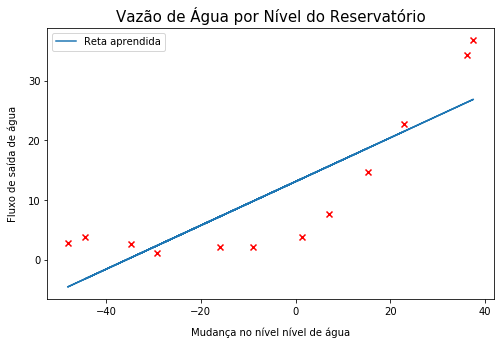

In [148]:
# Criando figure e eixo
fig, ax = plt.subplots(figsize=(8, 5))

# Configurando plotagem dos dados
ax.scatter(X_train[:, 1:], y_train, marker='x', color='r')
ax.set_title('Vazão de Água por Nível do Reservatório', size=15)
ax.set_xlabel('Mudança no nível nível de água', size=10, labelpad=10)
ax.set_ylabel('Fluxo de saída de água', size=10, labelpad=10)

# Configurando plotagem da curva aprendida
ax.plot(X_train[:, 1:], X_train.dot(best_theta), label='Reta aprendida')

plt.legend()
plt.show()

Conclusão: *o modelo sofre de **bias (viés)** alto!*

### Curvas de Aprendizado

Um conceito muito importante para a avaliação de modelos é a relação ```viés-variância```. Se por um lado, um modelo com alto ```viés``` tende a sofrer de ```underfitting```, por outro, um modelo com alta ```variância``` está sujeito a ```overfitting```.

Para analisar essa relação, é possível plotar curvas de aprendizado para mostrar as consequências do treinamento de acordo com a ```quantidade``` dos dados utilizados.

In [152]:
X_train[:1,:]

array([[  1.        , -15.93675813]])

In [181]:
# Levantando dados
error_train = []
error_cv = []
lamda = 0
m = X_train.shape[0]

# Adicionando bias em X_val
mval = X_val.shape[0]
X_val = np.c_[(np.ones((mval, 1)), X_val)]

# Redimensionando y_val
y_val = y_val.reshape(-1)

for i in range(1, m+1):
    theta_learned_train, J_min_train = trainLinReg(theta_inicial, X_train, y_train, lamda)
    theta_learned_cv, J_min_cv = trainLinReg(theta_inicial, X_val, y_val, lamda)
    #J_train = linRegCostFunction(theta_learned, X_train[:i, :], y_train[:i], lamda)
    #J_val = linRegCostFunction(theta_learned, X_val[:i, :], y_val[:i], lamda)
    error_train.append(J_min_train)
    error_cv.append(J_min_cv)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 28.306335
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 28.306335
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 28.306335
         Iterations: 10
         Function evaluations:

In [184]:
error_train

[22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017,
 22.373906495116017]

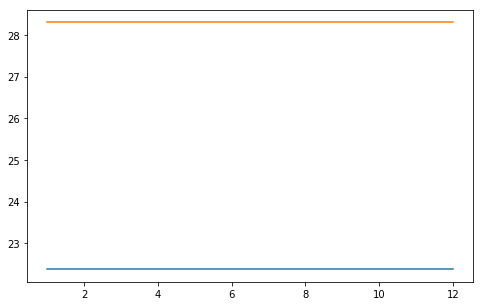

In [182]:
# Plotando dados
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.arange(m)+1, error_train)
ax.plot(np.arange(m)+1, error_cv)
plt.show()

TODO

Verificar theta_learned como argumento de cada uma das funções de treinamento (o gráfico ficou assim pq utilizamos sempre theta_inicial para treinamento)